<a href="https://colab.research.google.com/github/aviaga/FutureMakers/blob/main/Day%2022%20(7-27)%20-%20Project%20on%20Creating%20a%20Speech%20Analyzer%20(Affective%20Computing).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Intro
This is the implementation of Day 22's Action Item for SureStart's summer program, 2021.

The goal is to build a model that can analyze voices.

The dataset for this activity can be found in [this](https://github.com/MITESHPUTHRANNEU/Speech-Emotion-Analyzer) Github repo. The tutorial/code for this project was adapted from the above link, as well as from my team mentor for the program.

In [40]:
#Importing libraries
import tensorflow as tf
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

from keras import regularizers
import os
from keras.models import load_model

import scipy.io.wavfile
import os

In [41]:
#Importing the .h5 model

model = load_model('/content/Emotion_Voice_Detection_Model.h5')


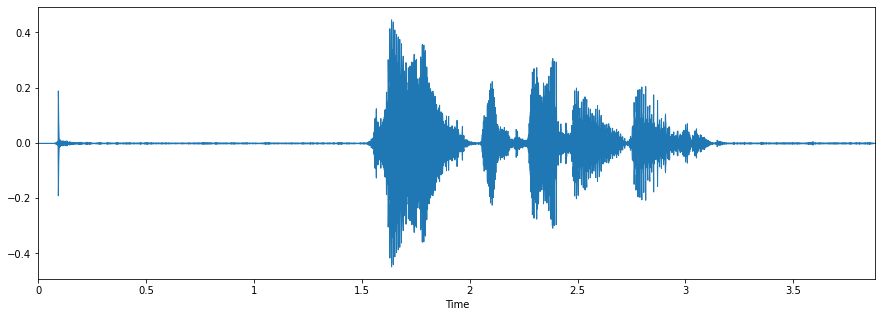

In [42]:
#Visualizing my voice recording as a wave
data, sampling_rate = librosa.load('/content/Recording 1.wav')
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

In [43]:
X, sample_rate = librosa.load('/content/Recording 1.wav', res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
feature = mfccs

In [44]:
model.summary()
feature = np.atleast_2d(feature)
feature = np.expand_dims(feature,axis=2)
predict = model.predict(feature)

print(np.argmax(predict,axis=1))

"""
Key for results:
0 - female_angry
1 - female_calm
2 - female_fearful
3 - female_happy
4 - female_sad
5 - male_angry
6 - male_calm
7 - male_fearful
8 - male_happy
9 - male_sad
"""

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_7 (Conv1D)            (None, 216, 128)          768       
_________________________________________________________________
activation_8 (Activation)    (None, 216, 128)          0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 216, 128)          82048     
_________________________________________________________________
activation_9 (Activation)    (None, 216, 128)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 216, 128)          0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 27, 128)           0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 27, 128)         

'\nKey for results:\n0 - female_angry\n1 - female_calm\n2 - female_fearful\n3 - female_happy\n4 - female_sad\n5 - male_angry\n6 - male_calm\n7 - male_fearful\n8 - male_happy\n9 - male_sad\n'